<a href="https://colab.research.google.com/github/mahiiin/task3-linear_regression/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import numpy as np

In [4]:
# Load the dataset
df = pd.read_csv('/content/heart (1).csv')

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

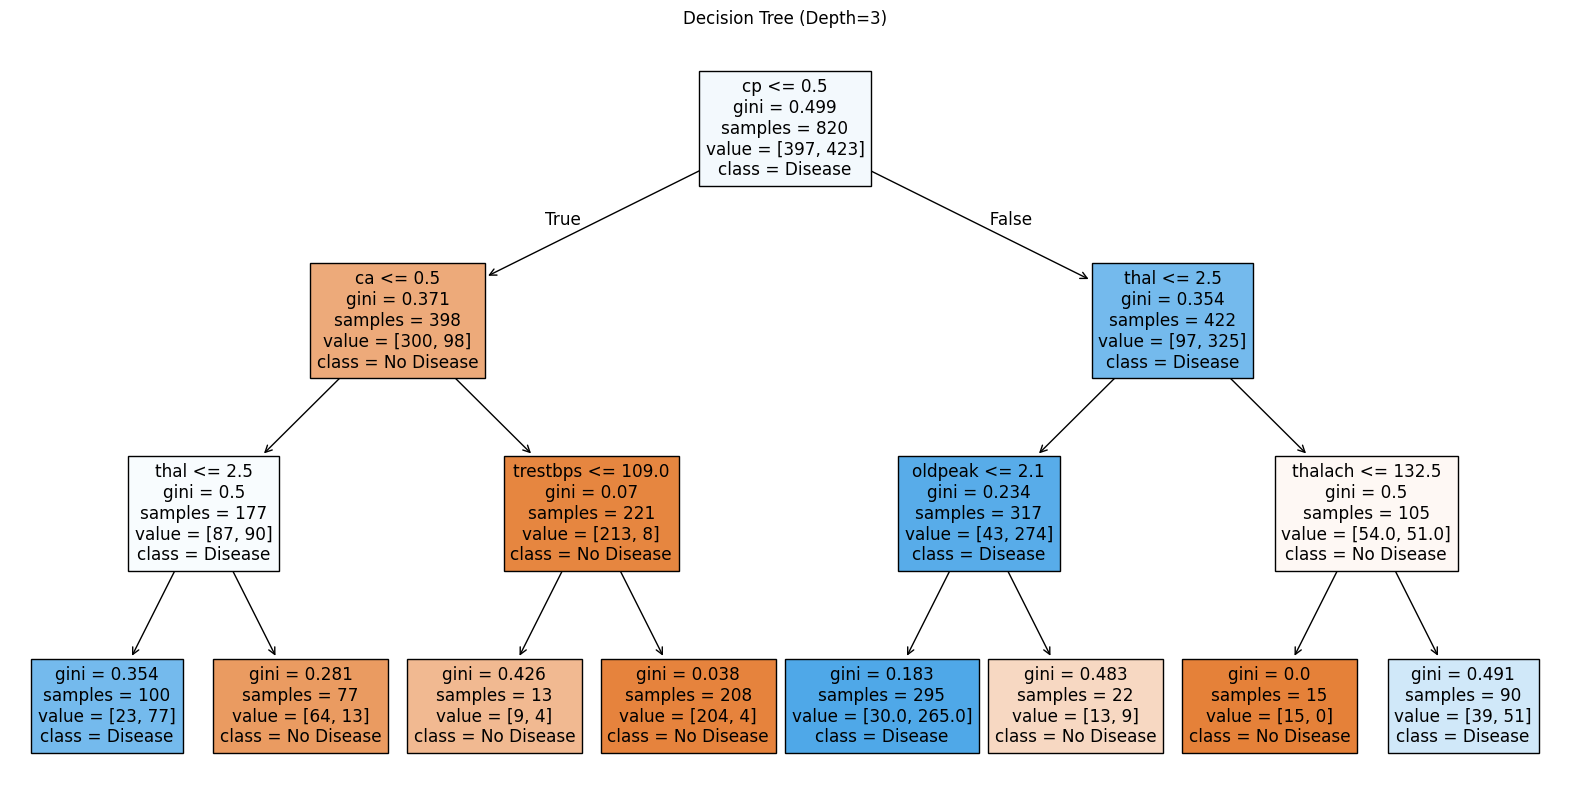

In [5]:
# Train Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# Plot tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree (Depth=3)")
plt.show()

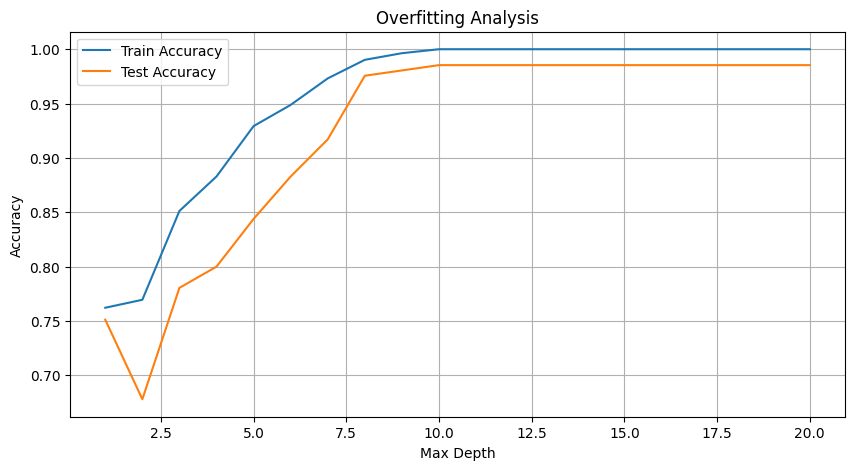

In [6]:
train_scores = []
test_scores = []
depths = range(1, 21)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Plot accuracy vs depth
plt.figure(figsize=(10, 5))
plt.plot(depths, train_scores, label='Train Accuracy')
plt.plot(depths, test_scores, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Accuracy comparison
tree_acc = accuracy_score(y_test, tree_clf.predict(X_test))
rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))

print(f"Decision Tree Accuracy: {tree_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")

Decision Tree Accuracy: 0.78
Random Forest Accuracy: 0.99


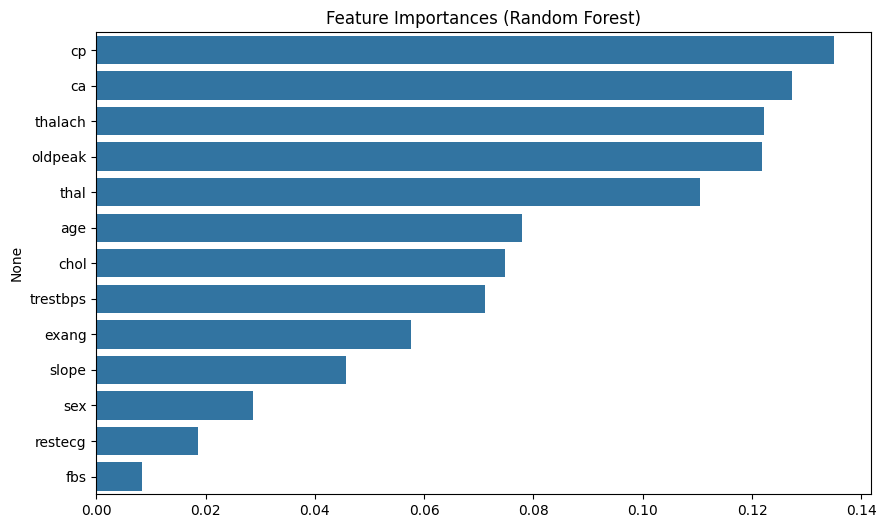

In [8]:
# Plot feature importances
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features_sorted = X.columns[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features_sorted)
plt.title("Feature Importances (Random Forest)")
plt.show()

In [9]:
# Cross-validation on Random Forest
cv_scores = cross_val_score(rf_clf, X, y, cv=5)
print(f"Cross-Validated Accuracy (Random Forest): {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-Validated Accuracy (Random Forest): 1.00 ± 0.01
